In [32]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [33]:
### Set-up - Define file location
filename = 'N-CMAPSS_DS08c-008.h5'

In [84]:
#TEST1
# Open the HDF5 file in read mode
with h5py.File(filename, 'r') as file:
    # Function to recursively print the structure of the HDF5 file
    def print_hdf5_structure(item, level=0):
        if isinstance(item, h5py.Group):
            print("  " * level + f"Group: {item.name}")
            for key in item.keys():
                print_hdf5_structure(item[key], level + 1)
        elif isinstance(item, h5py.Dataset):
            print("  " * level + f"Dataset: {item.name}")

    # Print the structure starting from the root of the file
    print_hdf5_structure(file)


Group: /
  Dataset: /A_dev
  Dataset: /A_test
  Dataset: /A_var
  Dataset: /T_dev
  Dataset: /T_test
  Dataset: /T_var
  Dataset: /W_dev
  Dataset: /W_test
  Dataset: /W_var
  Dataset: /X_s_dev
  Dataset: /X_s_test
  Dataset: /X_s_var
  Dataset: /X_v_dev
  Dataset: /X_v_test
  Dataset: /X_v_var
  Dataset: /Y_dev
  Dataset: /Y_test


In [85]:
print("DF1", A_var)
print("DF2", T_var)
print("W", W_var)
print("X_s", X_s_var)
print("X_v", X_v_var)

DF1 ['unit', 'cycle', 'Fc', 'hs']
DF2 ['fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod', 'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod', 'LPT_eff_mod', 'LPT_flow_mod']
W ['alt', 'Mach', 'TRA', 'T2']
X_s ['T24', 'T30', 'T48', 'T50', 'P15', 'P2', 'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf']
X_v ['T40', 'P30', 'P45', 'W21', 'W22', 'W25', 'W31', 'W32', 'W48', 'W50', 'SmFan', 'SmLPC', 'SmHPC', 'phi']


In [86]:
#TEST2
# Open the HDF5 file in read mode
with h5py.File(filename, 'r') as file:
    # Access the datasets within the file
    dataset1 = file['T_var']
    dataset2 = file['A_test']

    # Extract the data from the datasets
    data1 = dataset1[:]
    data2 = dataset2[:]

# Now, 'data1' and 'data2' contain the extracted data from the corresponding datasets


In [87]:
#TEST3
df1 = pd.DataFrame(data1)
print(df1)

                 0
0   b'fan_eff_mod'
1  b'fan_flow_mod'
2   b'LPC_eff_mod'
3  b'LPC_flow_mod'
4   b'HPC_eff_mod'
5  b'HPC_flow_mod'
6   b'HPT_eff_mod'
7  b'HPT_flow_mod'
8   b'LPT_eff_mod'
9  b'LPT_flow_mod'


#### Read Raw Data

In [88]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
with h5py.File(filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.08046875

W shape: (6417737, 4)
X_s shape: (6417737, 14)
X_v shape: (6417737, 14)
T shape: (6417737, 10)
A shape: (6417737, 4)


In [38]:
#df1 = pd.DataFrame(X_s)
#print(df1)

## Auxiliary Information ($A$)

In [39]:
#Creating the dataset and assigning the variables name.
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

unit         cycle            Fc            hs
count  6.417737e+06  6.417737e+06  6.417737e+06  6.417737e+06
mean   5.023070e+00  2.791715e+01  2.587368e+00  3.284366e-01
std    2.835982e+00  1.598913e+01  4.923077e-01  4.696446e-01
min    1.000000e+00  1.000000e+00  2.000000e+00  0.000000e+00
25%    3.000000e+00  1.400000e+01  2.000000e+00  0.000000e+00
50%    5.000000e+00  2.800000e+01  3.000000e+00  0.000000e+00
75%    7.000000e+00  4.100000e+01  3.000000e+00  1.000000e+00
max    1.000000e+01  6.200000e+01  3.000000e+00  1.000000e+00

In [40]:
print(df_A)

         unit  cycle   Fc   hs
0         1.0    1.0  3.0  1.0
1         1.0    1.0  3.0  1.0
2         1.0    1.0  3.0  1.0
3         1.0    1.0  3.0  1.0
4         1.0    1.0  3.0  1.0
...       ...    ...  ...  ...
6417732  10.0   54.0  2.0  0.0
6417733  10.0   54.0  2.0  0.0
6417734  10.0   54.0  2.0  0.0
6417735  10.0   54.0  2.0  0.0
6417736  10.0   54.0  2.0  0.0

[6417737 rows x 4 columns]


###  Units Ids

In [41]:
print('Engine units in df: ', np.unique(df_A['unit']))

Engine units in df:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### Flight Classes

The units are divided into three flight classes depending on whether the unit is operating short-length flights (i.e., flight class 1), medium-length flights (i.e., flight class 2), or long-length flights (i.e., flight class 2). A number of real flight conditions are available within each of the flight classes.

| Flight Class   | Flight Length [h]
| :-----------:  | :-----------:    
| 1              |    1 to 3        
| 2              |    3 to 5        
| 3              |    5 to 7        


Text(0, 0.5, 'Flight Class # [-]')

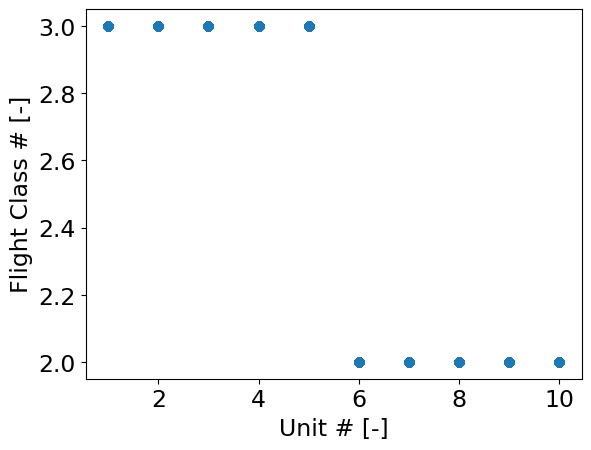

In [42]:
labelsize = 17
plt.plot(df_A.unit, df_A.Fc, 'o')
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlabel('Unit # [-]', fontsize=labelsize)
plt.ylabel('Flight Class # [-]', fontsize=labelsize )

### End Of Failure ($t_{\text{EOF}}$)

The run to failure operation take a different number of cycles for each unit. Below we report the total number of cycles for each unit.

In [43]:
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

Unit: 1.0 - Number of flight cyles (t_{EOF}):  53
Unit: 2.0 - Number of flight cyles (t_{EOF}):  52
Unit: 3.0 - Number of flight cyles (t_{EOF}):  53
Unit: 4.0 - Number of flight cyles (t_{EOF}):  48
Unit: 5.0 - Number of flight cyles (t_{EOF}):  50
Unit: 6.0 - Number of flight cyles (t_{EOF}):  60
Unit: 7.0 - Number of flight cyles (t_{EOF}):  62
Unit: 8.0 - Number of flight cyles (t_{EOF}):  62
Unit: 9.0 - Number of flight cyles (t_{EOF}):  59
Unit: 10.0 - Number of flight cyles (t_{EOF}):  54


## Operative Conditions ($w$)

DASHlink- Flight Data For Tail 687.(2012). Retrieved on 2019-01-29 from https://c3.nasa.gov/dashlink/

In [99]:
print(W_var)

['alt', 'Mach', 'TRA', 'T2']


In [44]:
df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values

In [61]:
print(df_W)

            alt      Mach        TRA          T2  unit
0        3008.0  0.350658  78.222099  520.434430   1.0
1        3014.0  0.350658  78.222099  520.413179   1.0
2        3022.0  0.351540  77.782646  520.445512   1.0
3        3027.0  0.351036  77.255310  520.391947   1.0
4        3038.0  0.352233  76.640076  520.438472   1.0
...         ...       ...        ...         ...   ...
6417732  3015.0  0.212625  42.275089  512.509382  10.0
6417733  3012.0  0.211302  42.890320  512.464381  10.0
6417734  3009.0  0.210924  43.153988  512.459609  10.0
6417735  3006.0  0.211428  43.241879  512.490731  10.0
6417736  3003.0  0.210420  43.241879  512.458975  10.0

[6417737 rows x 5 columns]


In [45]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [46]:
def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

### Flight Traces

<Figure size 640x480 with 0 Axes>

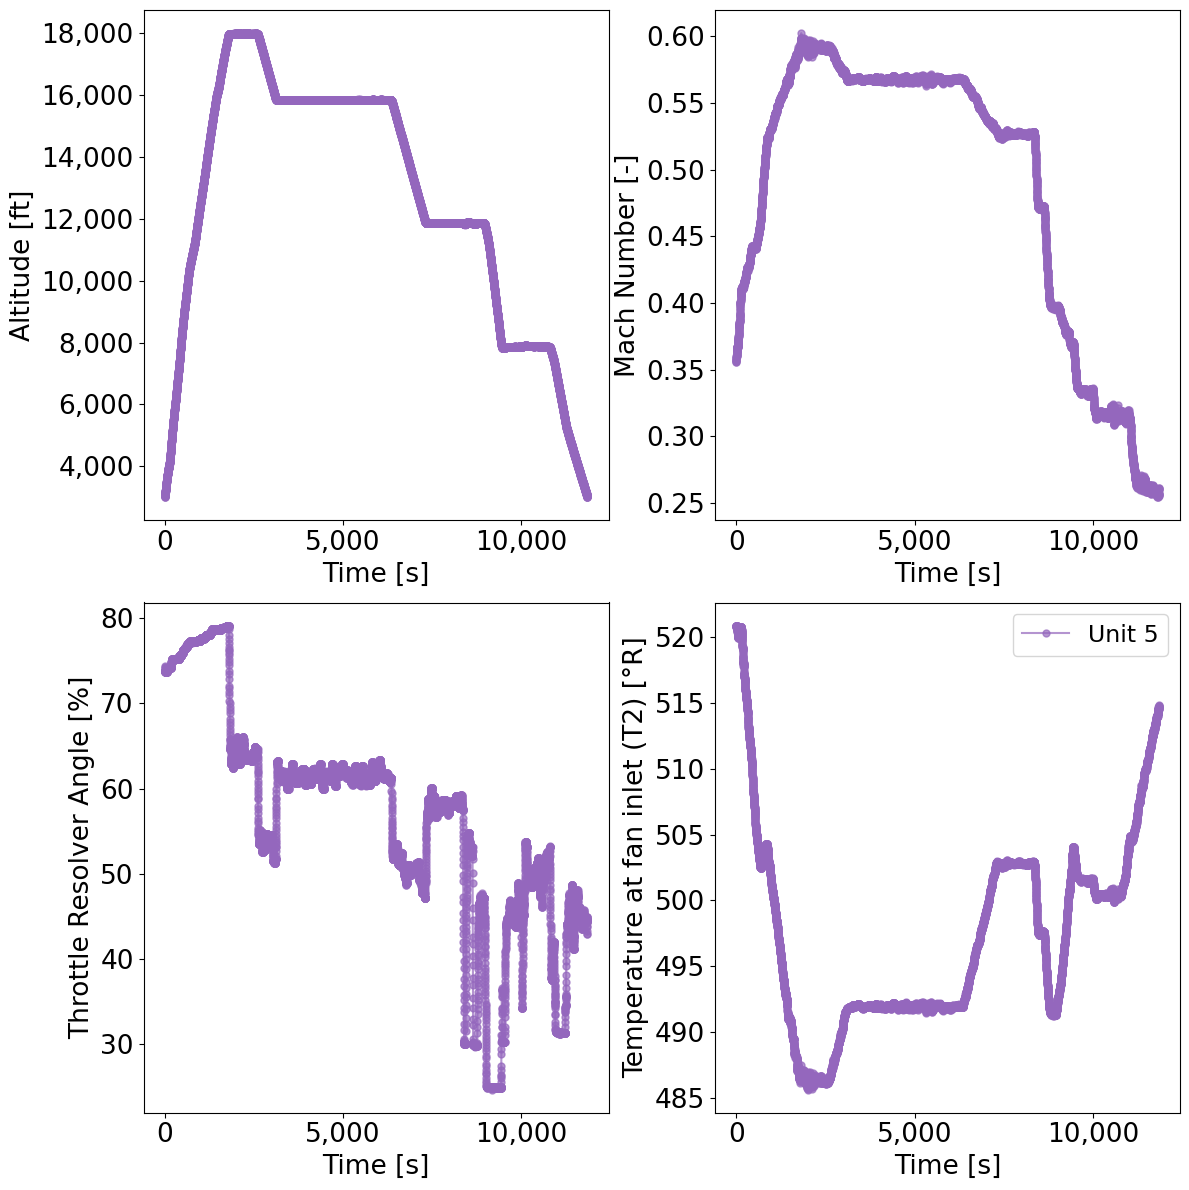

In [47]:
df_W_u = df_W.loc[(df_A.unit == 5) & (df_A.cycle == 1)]
df_W_u.reset_index(inplace=True, drop=True)
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

### Flight envelope

Text(0, 0.5, 'Flight Altitude - [ft]')

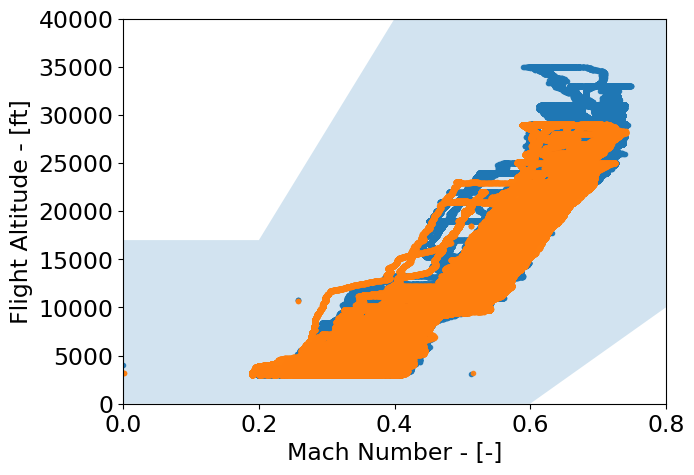

In [48]:
labelsize = 17
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8])
u = np.array([1.7, 1.7, 4.0, 4.0, 4.0])*10000
l = np.array([0.0, 0.0, 0.0, 0.0, 1.0])*10000
plt.figure(figsize=(7,5)) 
plt.fill_between(x, l, u, alpha=0.2)
plt.plot(df_W.loc[df_A['Fc'] == 3, 'Mach'], df_W.loc[df_A['Fc'] == 3, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 2, 'Mach'], df_W.loc[df_A['Fc'] == 2, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 1, 'Mach'], df_W.loc[df_A['Fc'] == 1, 'alt'], '.', alpha=0.9)
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlim((0.0, 0.8))
plt.ylim((0, 40000)) 
plt.xlabel('Mach Number - [-]', fontsize=labelsize)
plt.ylabel('Flight Altitude - [ft]', fontsize=labelsize)

### Histogram of Flight Conditions

In [49]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()

<Figure size 640x480 with 0 Axes>

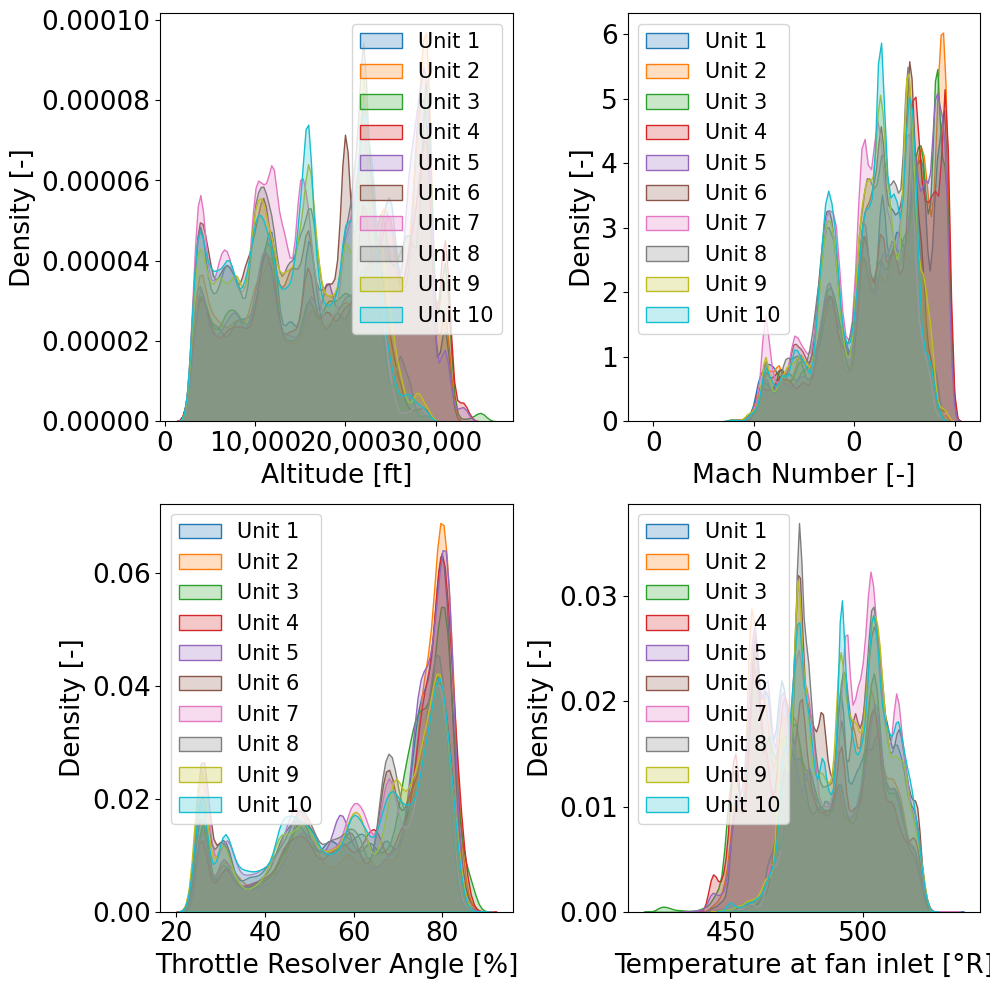

In [50]:
variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=19, name='kde_DS02.png')

## Degradation ($\theta$)

In [101]:
print(T_var)

['fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod', 'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod', 'LPT_eff_mod', 'LPT_flow_mod']


In [102]:
print(A_var)

['unit', 'cycle', 'Fc', 'hs']


In [51]:
df_T = DataFrame(data=T, columns=T_var) 
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_Ts = df_T.drop_duplicates()
df_Ts.describe()

fan_eff_mod  fan_flow_mod  LPC_eff_mod  LPC_flow_mod  HPC_eff_mod  \
count   553.000000    553.000000   553.000000    553.000000   553.000000   
mean     -0.002434     -0.003002    -0.002229     -0.002531    -0.001850   
std       0.003832      0.003582     0.003071      0.003126     0.002138   
min      -0.039840     -0.026994    -0.030470     -0.025556    -0.016764   
25%      -0.002488     -0.003488    -0.002528     -0.003023    -0.002089   
50%      -0.001249     -0.001566    -0.001266     -0.001305    -0.001158   
75%      -0.000813     -0.000976    -0.000676     -0.000795    -0.000734   
max      -0.000163     -0.000161     0.000112     -0.000014     0.000160   

       HPC_flow_mod  HPT_eff_mod  HPT_flow_mod  LPT_eff_mod  LPT_flow_mod  \
count    553.000000   553.000000    553.000000   553.000000    553.000000   
mean      -0.002334    -0.002028     -0.002213    -0.002228     -0.002173   
std        0.003120     0.002172      0.002618     0.002695      0.002680   
min       -0.028337    -0.015859     -0.025330    -0.021040     -0.025745   
25%       -0.002827    -0.002292     -0.002815    -0.002275     -0.002731   
50%       -0.001245    -0.001297     -0.001308    -0.001303     -0.001319   
75%       -0.000722    -0.000805     -0.000909    -0.000893     -0.000724   
max        0.000063    -0.000078      0.000001    -0.000053      0.000139   

             unit       cycle  
count  553.000000  553.000000  
mean     5.640145   28.358047  
std      2.858178   16.333875  
min      1.000000    1.000000  
25%      3.000000   14.000000  
50%      6.000000   28.000000  
75%      8.000000   42.000000  
max     10.000000   62.000000

In [62]:
print(df_Ts)

         fan_eff_mod  fan_flow_mod  LPC_eff_mod  LPC_flow_mod  HPC_eff_mod  \
0          -0.000534     -0.000932    -0.000130     -0.000578     0.000160   
11636      -0.000545     -0.001091    -0.000118     -0.000381     0.000083   
28944      -0.000681     -0.000851    -0.000472     -0.000553     0.000002   
44274      -0.000637     -0.000772    -0.000268     -0.000497     0.000104   
57307      -0.000522     -0.000942    -0.000453     -0.000590    -0.000159   
...              ...           ...          ...           ...          ...   
6377313    -0.001726     -0.010485    -0.007168     -0.003584    -0.001924   
6384481    -0.001753     -0.011873    -0.007701     -0.004233    -0.001764   
6390322    -0.001944     -0.013146    -0.008754     -0.004404    -0.002080   
6402528    -0.001833     -0.014815    -0.009411     -0.004472    -0.002089   
6411825    -0.002160     -0.016365    -0.010210     -0.004915    -0.002415   

         HPC_flow_mod  HPT_eff_mod  HPT_flow_mod  LPT_eff_mod  

In [52]:
import plotly.express as px
varsel = ['unit', 'HPT_eff_mod', 'LPT_eff_mod', 'LPT_flow_mod']
df_Tss = df_Ts.loc[:,varsel]
fig = px.parallel_coordinates(df_Tss, color="unit", labels={"unit": "Units",
                              "HPT_eff_mod": "HPT_eff_mod", "LPT_eff_mod": "LPT_eff_mod",
                              "LPT_flow_mod": "LPT_flow_mod", },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

<Figure size 640x480 with 0 Axes>

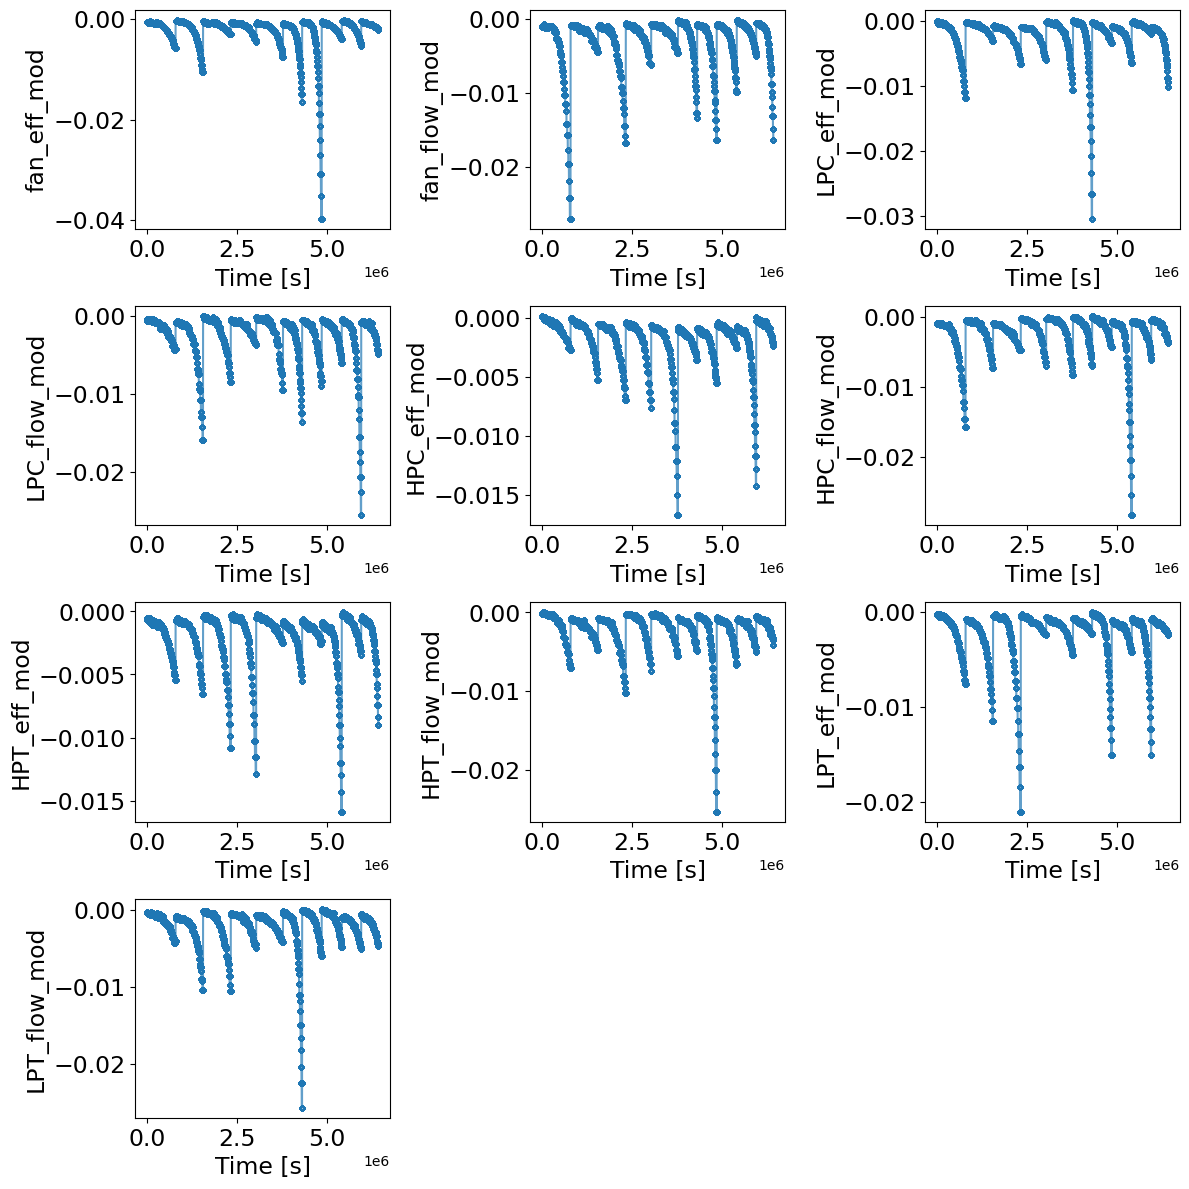

In [53]:
labels = T_var
plot_df_single_color(df_T, T_var , labels)

<Figure size 640x480 with 0 Axes>

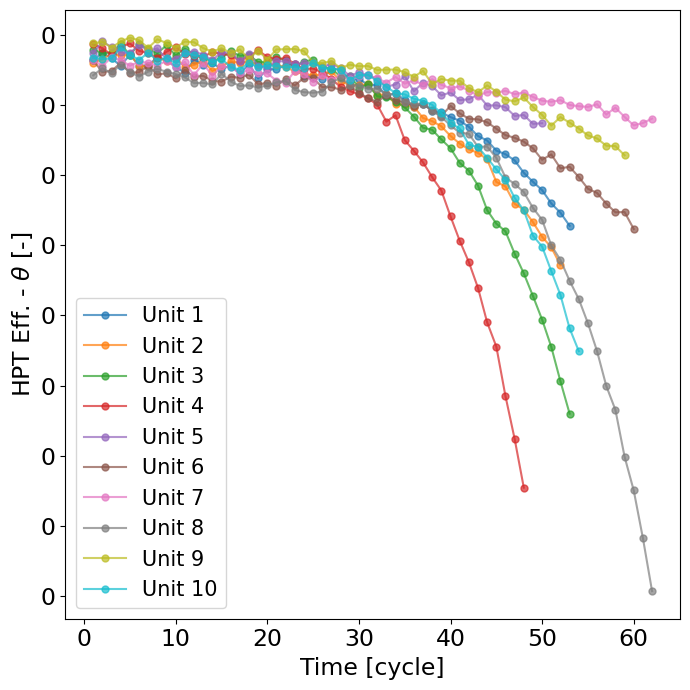

In [54]:
plot_df_color_per_unit(df_Ts, ['HPT_eff_mod'], [r'HPT Eff. - $\theta$ [-]'], size=7,  option='cycle')

## Sensor readings ($X_s$)

In [55]:
df_X_s = DataFrame(data=X_s, columns=X_s_var) 

###  Single Unit 

<Figure size 640x480 with 0 Axes>

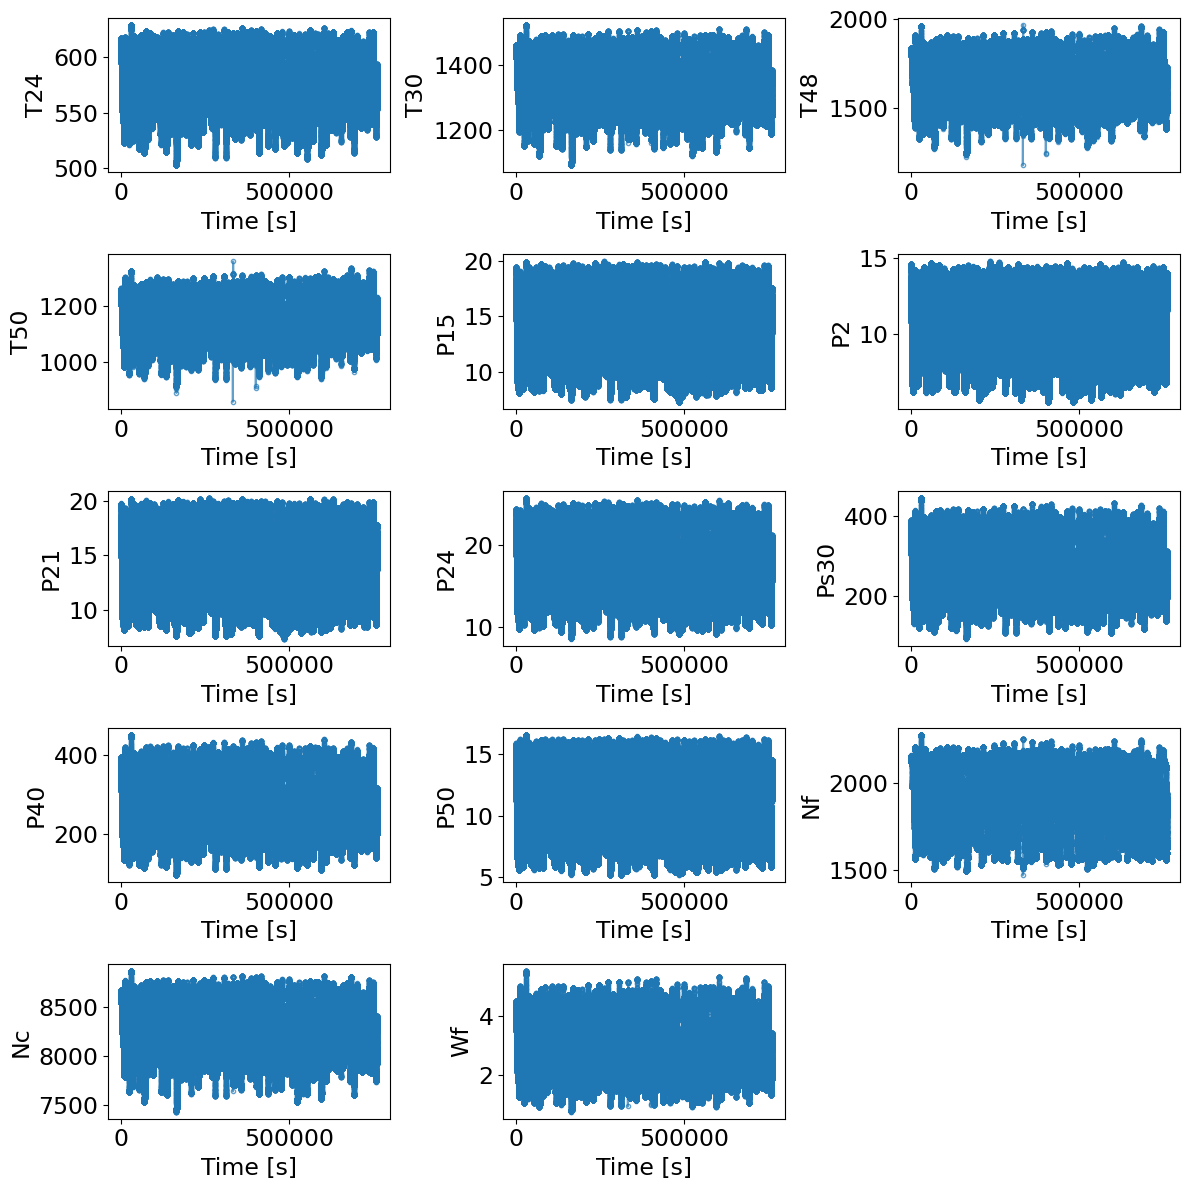

In [56]:
df_X_s_u = df_X_s.loc[df_A.unit == 2]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

###  Single Flight Cycle

<Figure size 640x480 with 0 Axes>

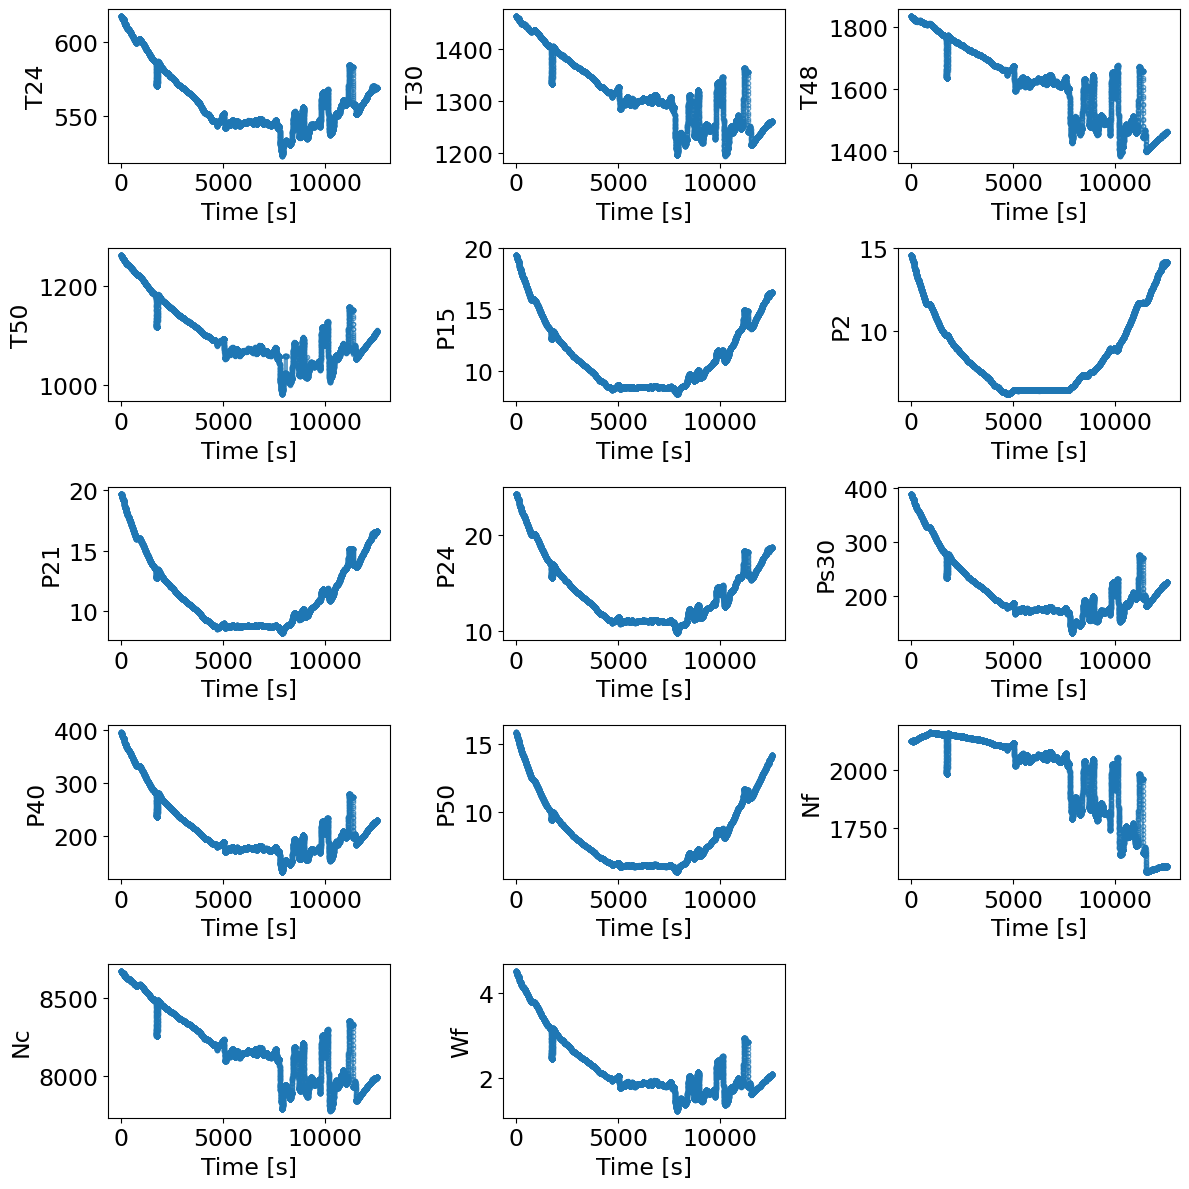

In [57]:
df_X_s_u_c = df_X_s.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)

## Virtual Sensors ($X_v$)

In [58]:
df_X_v = DataFrame(data=X_v, columns=X_v_var) 

<Figure size 640x480 with 0 Axes>

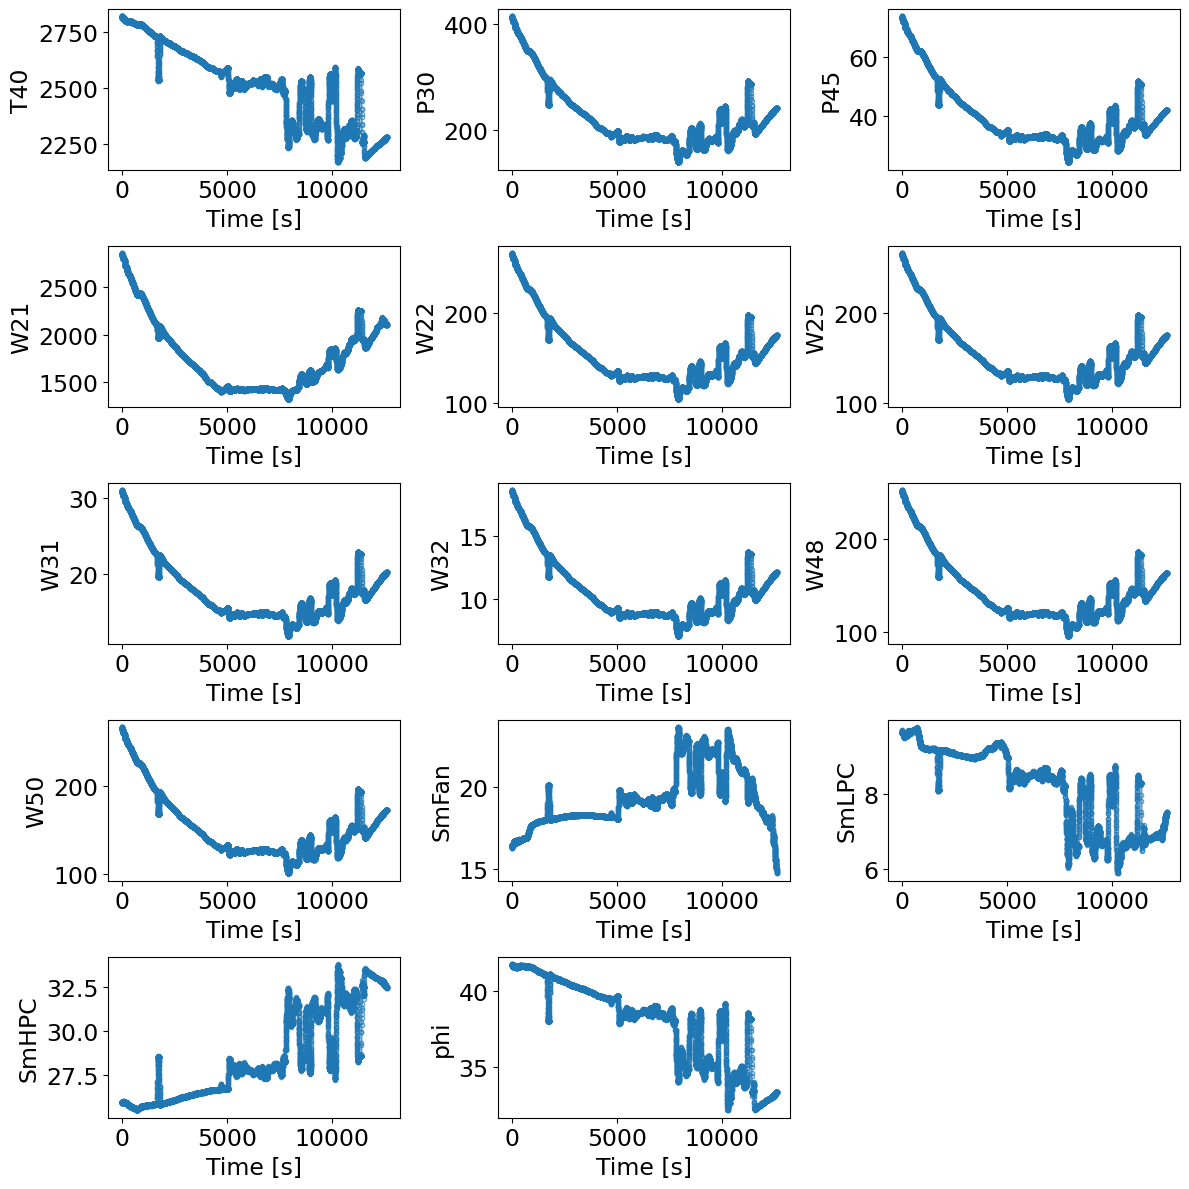

In [59]:
df_X_v_u_c = df_X_v.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_v_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_v_u_c, X_v_var, X_v_var)

## Health state ($h_s$)

<Figure size 640x480 with 0 Axes>

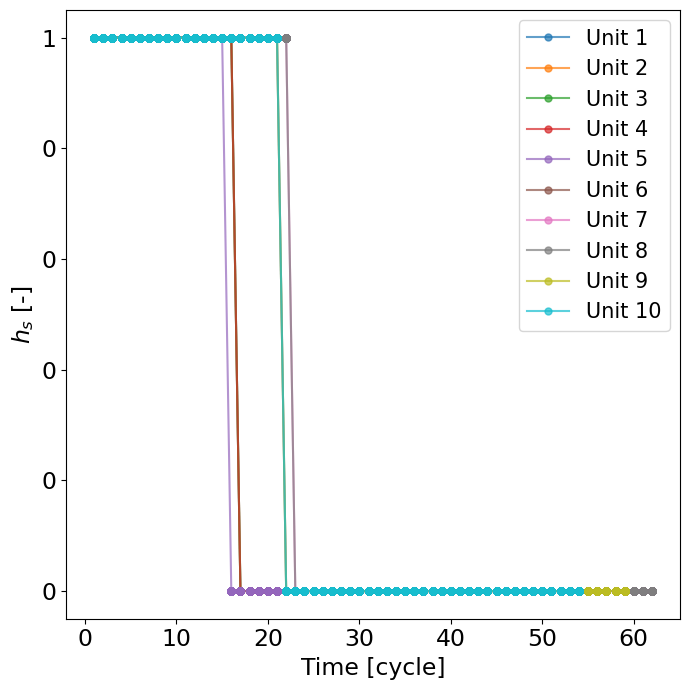

In [60]:
plot_df_color_per_unit(df_A, ['hs'], [r'$h_s$ [-]'], option='cycle')

In [94]:
df_A = DataFrame(data=A, columns=A_var)
print(df_A)

         unit  cycle   Fc   hs
0         1.0    1.0  3.0  1.0
1         1.0    1.0  3.0  1.0
2         1.0    1.0  3.0  1.0
3         1.0    1.0  3.0  1.0
4         1.0    1.0  3.0  1.0
...       ...    ...  ...  ...
6417732  10.0   54.0  2.0  0.0
6417733  10.0   54.0  2.0  0.0
6417734  10.0   54.0  2.0  0.0
6417735  10.0   54.0  2.0  0.0
6417736  10.0   54.0  2.0  0.0

[6417737 rows x 4 columns]


In [95]:
W = DataFrame(data=W, columns=W_var)
print(W)

            alt      Mach        TRA          T2
0        3008.0  0.350658  78.222099  520.434430
1        3014.0  0.350658  78.222099  520.413179
2        3022.0  0.351540  77.782646  520.445512
3        3027.0  0.351036  77.255310  520.391947
4        3038.0  0.352233  76.640076  520.438472
...         ...       ...        ...         ...
6417732  3015.0  0.212625  42.275089  512.509382
6417733  3012.0  0.211302  42.890320  512.464381
6417734  3009.0  0.210924  43.153988  512.459609
6417735  3006.0  0.211428  43.241879  512.490731
6417736  3003.0  0.210420  43.241879  512.458975

[6417737 rows x 4 columns]


In [96]:
Y_var = ['RUL']
Y = DataFrame(data=Y, columns=Y_var)
print(Y)

         RUL
0         52
1         52
2         52
3         52
4         52
...      ...
6417732    0
6417733    0
6417734    0
6417735    0
6417736    0

[6417737 rows x 1 columns]


In [98]:
df_combined = pd.concat([df_A, W, Y], axis=1)
print(df_combined)

         unit  cycle   Fc   hs     alt      Mach        TRA          T2  RUL
0         1.0    1.0  3.0  1.0  3008.0  0.350658  78.222099  520.434430   52
1         1.0    1.0  3.0  1.0  3014.0  0.350658  78.222099  520.413179   52
2         1.0    1.0  3.0  1.0  3022.0  0.351540  77.782646  520.445512   52
3         1.0    1.0  3.0  1.0  3027.0  0.351036  77.255310  520.391947   52
4         1.0    1.0  3.0  1.0  3038.0  0.352233  76.640076  520.438472   52
...       ...    ...  ...  ...     ...       ...        ...         ...  ...
6417732  10.0   54.0  2.0  0.0  3015.0  0.212625  42.275089  512.509382    0
6417733  10.0   54.0  2.0  0.0  3012.0  0.211302  42.890320  512.464381    0
6417734  10.0   54.0  2.0  0.0  3009.0  0.210924  43.153988  512.459609    0
6417735  10.0   54.0  2.0  0.0  3006.0  0.211428  43.241879  512.490731    0
6417736  10.0   54.0  2.0  0.0  3003.0  0.210420  43.241879  512.458975    0

[6417737 rows x 9 columns]


In [104]:
from sklearn.model_selection import train_test_split

#Specifying the Features and predicters
X = df_combined.drop('RUL', axis=1)  
y = df_combined['RUL'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



unit         cycle            Fc            hs           alt  \
count  5.134189e+06  5.134189e+06  5.134189e+06  5.134189e+06  5.134189e+06   
mean   5.022957e+00  2.791274e+01  2.587360e+00  3.285350e-01  1.719929e+04   
std    2.835858e+00  1.598904e+01  4.923092e-01  4.696805e-01  7.976764e+03   
min    1.000000e+00  1.000000e+00  2.000000e+00  0.000000e+00  3.001000e+03   
25%    3.000000e+00  1.400000e+01  2.000000e+00  0.000000e+00  1.062700e+04   
50%    5.000000e+00  2.800000e+01  3.000000e+00  0.000000e+00  1.742700e+04   
75%    7.000000e+00  4.100000e+01  3.000000e+00  1.000000e+00  2.396800e+04   
max    1.000000e+01  6.200000e+01  3.000000e+00  1.000000e+00  3.503300e+04   

               Mach           TRA            T2  
count  5.134189e+06  5.134189e+06  5.134189e+06  
mean   5.579330e-01  6.262010e+01  4.864107e+02  
std    1.186578e-01  1.791908e+01  1.950450e+01  
min    3.150000e-04  2.355452e+01  4.213779e+02  
25%    4.705470e-01  4.886684e+01  4.709607e+02  
50%    5.739930e-01  6.881787e+01  4.868591e+02  
75%    6.509160e-01  7.830999e+01  5.034184e+02  
max    7.492590e-01  8.876890e+01  5.343834e+02